In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
%matplotlib inline

In [2]:
dt=pd.read_csv(r'C:\Users\DELL\Downloads\advertising.csv')
dt.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
dt.columns=['TV','Radio','Newspaper','Sales']
dt.shape

(200, 4)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Newspaper', ylabel='Sales'>

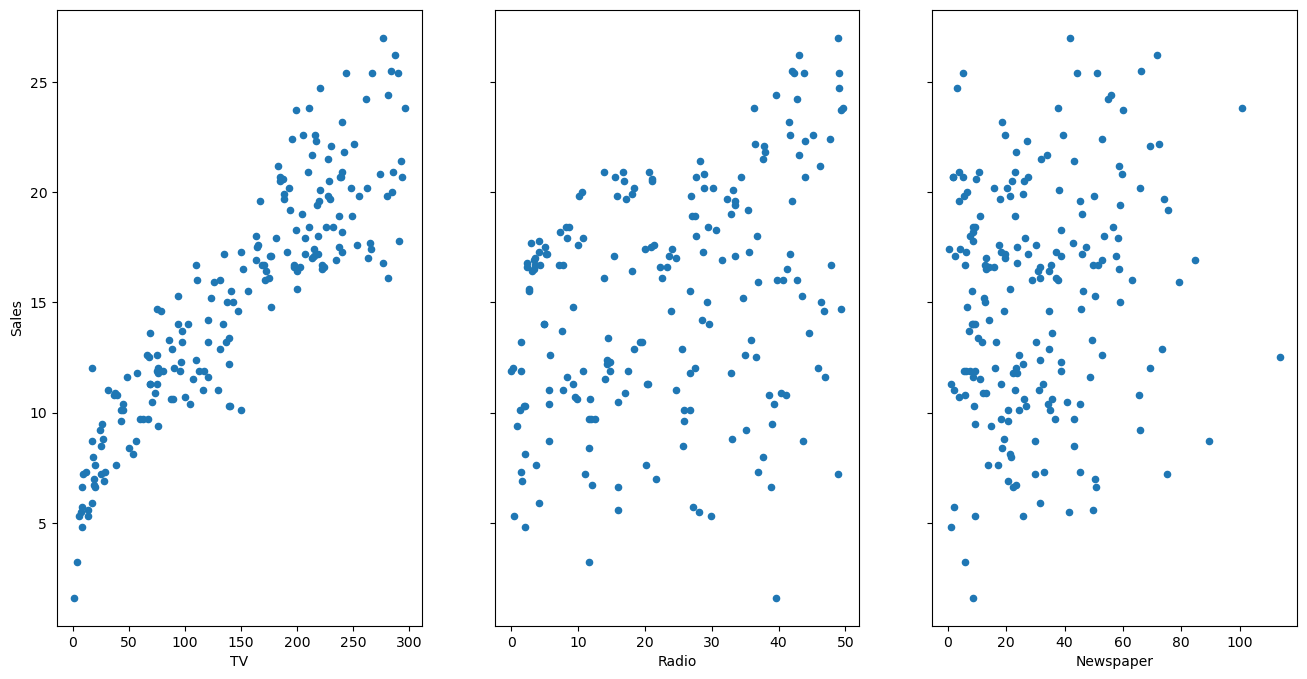

In [4]:
fig,axs=plt.subplots(1,3,sharey=True)
dt.plot(kind='scatter',x='TV',y='Sales',ax=axs[0],figsize=(16,8))
dt.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1])
dt.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2])

In [5]:
feature_cols=['TV']
x=dt[feature_cols]
y=dt.Sales


In [6]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [7]:
print(lm.coef_)
print(lm.intercept_)

[0.05546477]
6.9748214882298925


In [8]:
6.974822+0.055465*50

9.748072

In [9]:
X_new=pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [10]:
lm.predict(X_new)

array([9.74806001])

In [11]:
X_new=pd.DataFrame({'TV':[dt.TV.min(),dt.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [12]:
preds=lm.predict(X_new)
preds

array([ 7.01364683, 23.41457946])

C:\Users\DELL\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


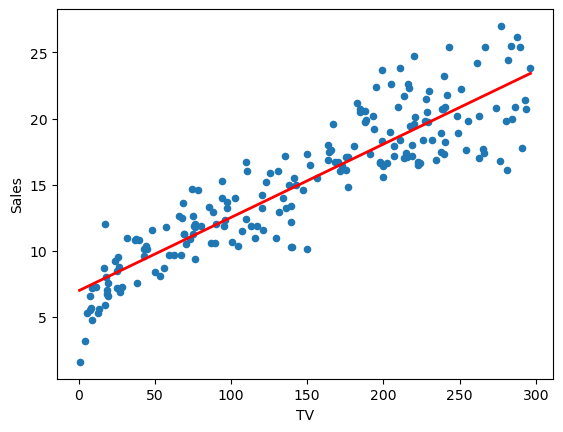

In [13]:
dt.plot(kind='scatter',x='TV',y='Sales')
plt.plot(X_new,preds,c='red',linewidth=2)

In [14]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='Sales~TV',data=dt).fit()

In [15]:
lm.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


In [17]:
lm.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

In [18]:
lm.rsquared

0.8121757029987414

In [19]:
feature_cols=['TV','Radio','Newspaper']
X=dt[feature_cols]
Y=dt.Sales

In [21]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

In [22]:
lm=LinearRegression()
lm.fit(X,Y)
print(lm.coef_)
print(lm.intercept_)

[0.05444578 0.10700123 0.00033566]
4.625124078808652


In [24]:
lm=LinearRegression()
lm.fit(Xtrain,Ytrain)
print(lm.intercept_)
print(lm.coef_)

4.743766701589687
[0.05358869 0.10270677 0.00793167]


In [26]:
predictions=lm.predict(Xtest)
print(sqrt(mean_squared_error(Ytest,predictions)))

1.5942471691143594


In [27]:
lm=smf.ols(formula='Sales~TV+Radio+Newspaper',data=dt).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 29 May 2023   Prob (F-statistic):           8.13e-99
Time:                        00:54:41   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
lm=smf.ols(formula='Sales~TV+Radio',data=dt).fit()
lm.rsquared

0.9025896186081139

In [31]:
lm=smf.ols(formula='Sales~TV+Radio+Newspaper',data=dt).fit()
lm.rsquared

0.9025912899684558

In [33]:
import numpy as np
np.random.seed(12345)

nums=np.random.rand(len(dt))
mask_large=nums>0.5

dt['Size']='small'
dt.loc[mask_large,'Size']='large'
dt.head()

,TV,Radio,Newspaper,Sales,Size
0,230.1,37.8,69.2,22.1,large
1,44.5,39.3,45.1,10.4,small
2,17.2,45.9,69.3,12.0,small
3,151.5,41.3,58.5,16.5,small
4,180.8,10.8,58.4,17.9,large


In [34]:
dt['Islarge']=dt.Size.map({'small':0,'large':1})
dt.head()

,TV,Radio,Newspaper,Sales,Size,Islarge
0,230.1,37.8,69.2,22.1,large,1
1,44.5,39.3,45.1,10.4,small,0
2,17.2,45.9,69.3,12.0,small,0
3,151.5,41.3,58.5,16.5,small,0
4,180.8,10.8,58.4,17.9,large,1


In [36]:
feature_cols=['TV','Radio','Newspaper','Islarge']
X=dt[feature_cols]
Y=dt.Sales

lm=LinearRegression()
lm.fit(X,y)

zip(feature_cols,lm.coef_)

In [37]:
np.random.seed(12345)

nums=np.random.rand(len(dt))
mask_suburban=(nums>0.33)&(nums<0.66)
mask_urban=nums>0.66
dt['Area']='rural'
dt.loc[mask_suburban,'Area']='suburban'
dt.loc[mask_urban,'Area']='urban'
dt.head()

,TV,Radio,Newspaper,Sales,Size,Islarge,Area
0,230.1,37.8,69.2,22.1,large,1,urban
1,44.5,39.3,45.1,10.4,small,0,rural
2,17.2,45.9,69.3,12.0,small,0,rural
3,151.5,41.3,58.5,16.5,small,0,rural
4,180.8,10.8,58.4,17.9,large,1,suburban


In [38]:
area_dummies=pd.get_dummies(dt.Area,prefix='Area').iloc[:,1:]
dt=pd.concat([dt,area_dummies],axis=1)
dt.head()

,TV,Radio,Newspaper,Sales,Size,Islarge,Area,Area_suburban,Area_urban
0,230.1,37.8,69.2,22.1,large,1,urban,0,1
1,44.5,39.3,45.1,10.4,small,0,rural,0,0
2,17.2,45.9,69.3,12.0,small,0,rural,0,0
3,151.5,41.3,58.5,16.5,small,0,rural,0,0
4,180.8,10.8,58.4,17.9,large,1,suburban,1,0


In [39]:
feature_cols=['TV','Radio','Newspaper','Islarge','Area_suburban','Area_urban']
X=dt[feature_cols]
Y=dt.Sales

lm=LinearRegression()
lm.fit(X,y)
print(feature_cols,lm.coef_)

['TV', 'Radio', 'Newspaper', 'Islarge', 'Area_suburban', 'Area_urban'] [ 5.46438921e-02  1.06368752e-01  2.92918250e-04 -2.27316983e-01
 -4.01728700e-01 -8.91192175e-02]
